<a href="https://colab.research.google.com/github/RandDahmash/Mining-project/blob/main/Phase3Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Problem Statement:

The problem addressed in this project is predicting students’ adaptability levels in online learning environments. As online education becomes more common, identifying which students struggle and which adapt well is critical for improving learning quality. This project aims to classify students into Low, Moderate, and High adaptability levels and understand which features influence adaptability. Solving this problem helps educators provide better support and allows institutions to design more effective digital learning systems.

# 2-Data Mining Task:

The problem is formalized as a data mining task involving both classification and clustering.

**1. Classification Task**

The goal of the classification task is to predict the student’s Adaptivity Level in online education (Low, Moderate, High)
This helps determine which factors influence adaptability and allows us to automatically classify new students into the appropriate adaptability category.

**2. Clustering Task**

The clustering task aims to group students into natural clusters based on similarities in their learning conditions, environment, and behavior.
This is useful for discovering hidden patterns, identifying groups of students with similar adaptability characteristics, and assisting educators in designing targeted support strategies.

**Overall Task Definition**
By combining classification (supervised learning) and clustering (unsupervised learning), the project seeks to both predict adaptability levels and explore underlying patterns in student behavior supporting a deeper understanding of student needs in online learning environments.

# 3-Data:

#Project Goal:
The project's main goal is a classification and clustring task. We will build a machine learning model to predict a student's adaptability level in an online education environment. This will help identify the factors that influence whether a student will have a low, moderate, or high level of adaptability. The ultimate aim is to use these insights to help educational institutions and policymakers improve online learning resources and support systems.



# Data Source Link :
https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

Data is from Kaggle


## Dataset Description
Dataset Description
1205 records, 14 attributes
Mix of categorical and numerical features
No missing values
Source: Kaggle (link)
Target variable = Adaptivity Level
Class Label Description
Low: Struggle with online learning
Moderate: Adapt fairly well
High: Very comfortable online learners

In [ ]:
import pandas as pd
data=pd.read_csv('Raw_dataset.csv')



target="Adaptivity Level"
all_columns = list(data.columns)
feature_columns = [c for c in all_columns if c !=target]


print("Feature columns in the database:")
print(feature_columns)
print("\nData types of features:")
print(data[feature_columns].dtypes)



print("Number of columns [excluding class]=",len(feature_columns))
print("The class attribute is : ",target)
print("Number of columns [including class]=",len(all_columns))




numOfRecords = len(data)
print("Number of records:", numOfRecords)



print("Class attribute is ",target)
print("Counts/label:")
print(data[target].value_counts().to_frame())


print("Sample of the database")
print(data.head(5))


In [ ]:
print("label /Counts:")
for c in all_columns:
  print(data[c].value_counts().to_frame())

# Class label

The target variable in this project is Adaptivity Level, which categorizes students into three classes based on how well they adapt to online learning:

Low – Students who struggle with online learning due to limited technology access, learning style mismatch, distractions, or weak online engagement.

Moderate – Students who adapt fairly well but may still face occasional challenges or require additional support.

High – Students who adapt extremely well, showing strong engagement, comfort with digital tools, and effective learning strategies in online environments.

Based on the dataset distribution:

Moderate: 51.9%

Low: 39.8%

High: 8.3%

This distribution shows that the class label is not balanced.

Most students fall into the Moderate and Low categories, while the High class is significantly smaller. This imbalance may affect model performance and should be considered during evaluation.



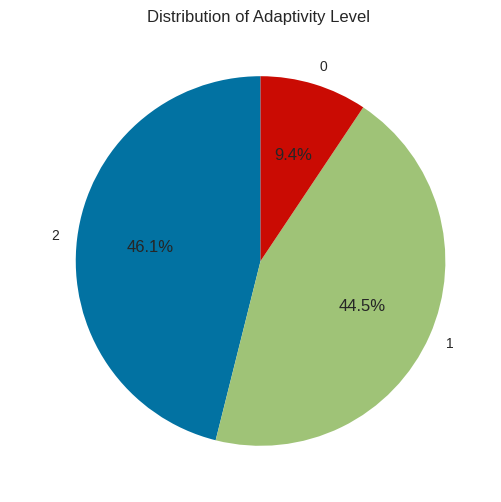

In [113]:
#class lable distribution

counts = df["Adaptivity Level"].value_counts()
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of Adaptivity Level ")
plt.ylabel(' ')
plt.show()

# Preprocessing:

## Loading the dataset and Import libraries:

In [ ]:
#read Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('students_adaptability_level_online_education.csv')
df=pd.DataFrame(data)
df_copy=df.copy()
df.head()



Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   
3           Low                 Mid   Mobile Data           4G            1-3   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No     Tab         Moderate  
1      Yes  Mobile         Moderate  
2       No  Mobile         Moderate  
3       No  Mobile         Moderate  
4       No  Mobile              Low

#Statistical Summries:

In [ ]:
#Statistical summries
df.describe()

Gender    Age Education Level Institution Type IT Student Location  \
count    1205   1205            1205             1205       1205     1205   
unique      2      6               3                2          2        2   
top       Boy  21-25          School   Non Government         No      Yes   
freq      663    374             530              823        901      935   

       Load-shedding Financial Condition Internet Type Network Type  \
count           1205                1205          1205         1205   
unique             2                   3             2            3   
top              Low                 Mid   Mobile Data           4G   
freq            1004                 878           695          775   

       Class Duration Self Lms  Device Adaptivity Level  
count            1205     1205    1205             1205  
unique              3        2       3                3  
top               1-3       No  Mobile         Moderate  
freq              840      995    1013              625

From the statistical summary, we can see for each attribute how many entries there are (count), how many different categories exist (unique), which value appears the most (top), and how many times it appears (freq). This helps me notice which values are the most common, like the most used device or the most frequent institution type.


Because the data is mostly categorical (not numeric), we can’t apply the five-number summary [which shows the minimum, Q1, median, Q3, and maximum] the way we do with numeric columns.

# Show Missing Values:

In [ ]:
#Missing values
print("\nTotal number of missing values in the dataset:", df.isna().sum())


Total number of missing values in the dataset: Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


The dataset contains no missing values in any column (all 1205 rows × 14 attributes are complete). Therefore, no imputation or deletion of missing data is required at this stage.

### Graphs:

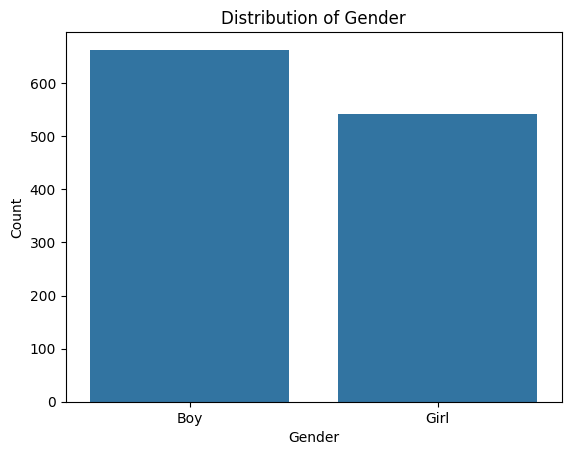

In [ ]:
#Bar-plot for Gender attribute
sns.countplot(x='Gender',data=df)
plt.title("Distribution of Gender")
plt.ylabel("Count")
plt.show()

Distribution of Gender: Bar Chart
This bar chart shows that the dataset has more boys (about 55%) than girls (about 45%).. the difference is not very large, but boys are still the majority group.


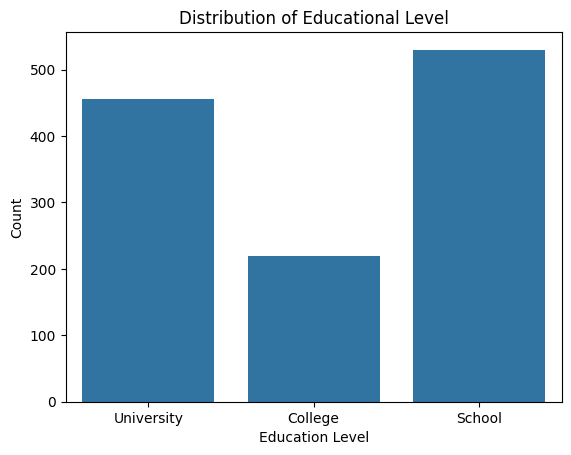

In [ ]:
##Bar-plot for  Education Level attribute
sns.countplot(x='Education Level', data=df)
plt.title("Distribution of Educational Level")
plt.ylabel("Count")
plt.show()

Distribution of Educational Level: Bar Chart
This bar chart shows that school students form the largest group (about %44), followed by university students (about 39%).. college students are the smallest group compared to the others (about 17%).


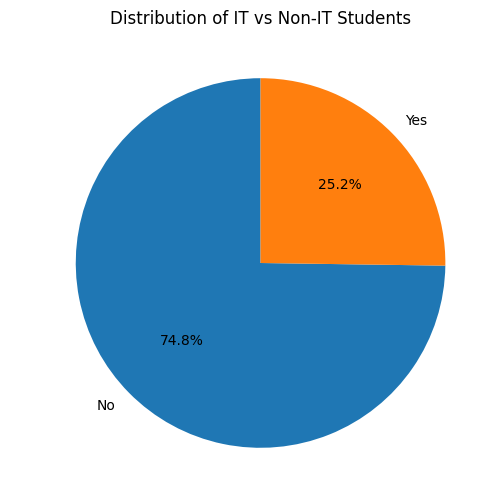

In [ ]:
# Count values for IT Student
counts = df["IT Student"].value_counts()

# Pie chart
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of IT vs Non-IT Students")
plt.ylabel(' ')
plt.show()

Distribution of IT vs Non-IT Students: Pie Chart





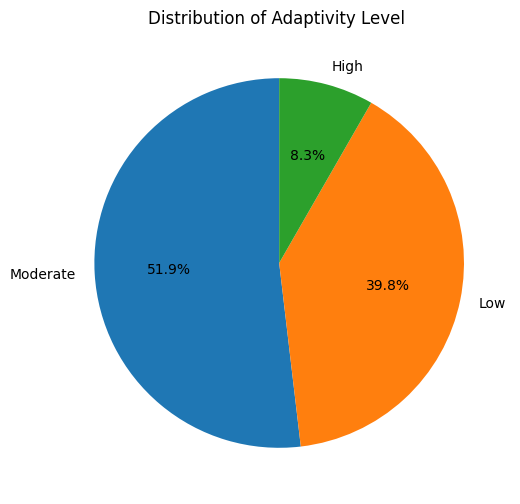

In [ ]:
#class lable distribution

counts = df["Adaptivity Level"].value_counts()
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of Adaptivity Level ")
plt.ylabel(' ')
plt.show()

Distribution of Adaptivity Level: Pie Chart

It shows that the dataset is not balanced across the three classes.
Moderate represents the majority class with 51.9% of students.
Low adaptability accounts for 39.8%, making it the second-largest group.
High adaptability is the minority class, representing only 8.3% of the dataset.
This distribution indicates a class imbalance, where the “High” class is significantly underrepresented compared to the other two. Such imbalance can influence model performance, causing classifiers to favor the majority classes (Moderate and Low) and struggle to correctly identify the minority class (High).



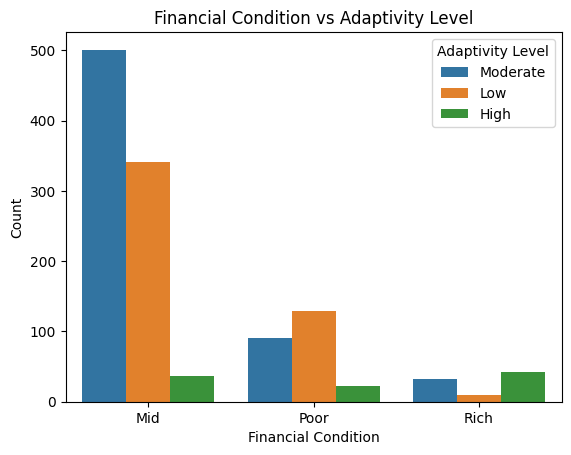

In [ ]:
#Grouped bar chart Financial Condition and Adaptivity Level
sns.countplot(x="Financial Condition", hue="Adaptivity Level", data=df)
plt.title("Financial Condition vs Adaptivity Level")
plt.ylabel("Count")
plt.show()


Financial Condition vs Adaptivity Level: Bar Chart
This bar chart shows that most students from middle financial condition are at moderate adaptability (about 55%).. students from poor condition are more likely to have low adaptability (about 60%), while rich students are very few overall (less than 5%).


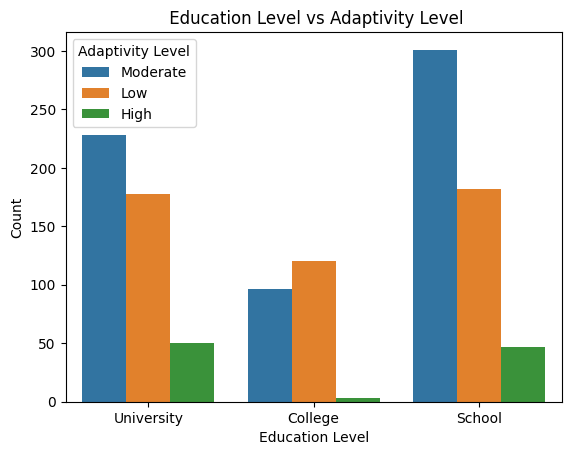

In [ ]:
##Grouped bar chart Education Level and Adaptivity Level
sns.countplot(x='Education Level', hue="Adaptivity Level", data=df)
plt.title(" Education Level vs Adaptivity Level")
plt.ylabel("Count")
plt.show()

This grouped bar chart compares Education Level (School, College, University) with Adaptivity Level (Low, Moderate, High).
It shows that most participants across all education levels have a Moderate adaptivity level, while High adaptivity is the least common.

In [ ]:
import pandas as pd

# Load raw dataset
df_raw = pd.read_csv("https://raw.githubusercontent.com/RandDahmash/Mining-project/main/Dataset/Raw_dataset.csv")


## Data Cleaning:

1- Removing Duplicates:

In [ ]:
# Check for duplicate rows
num_duplicates = df_raw.duplicated().sum()
print("Number of duplicate rows:", num_duplicates , "\n")

df_raw = df_raw.drop_duplicates()
print("DataFrame after dropping all duplicate rows:\n")
print(df_raw)
df_raw.to_csv('Cleaned_dataset.csv', index=False)

Number of duplicate rows: 949 

DataFrame after dropping all duplicate rows:

     Gender     Age Education Level Institution Type IT Student Location  \
0       Boy   21-25      University   Non Government         No      Yes   
1      Girl   21-25      University   Non Government         No      Yes   
2      Girl   16-20         College       Government         No      Yes   
3      Girl  15-Nov          School   Non Government         No      Yes   
4      Girl   16-20          School   Non Government         No      Yes   
...     ...     ...             ...              ...        ...      ...   
1124    Boy   21-25      University   Non Government        Yes       No   
1132    Boy   16-20         College       Government         No      Yes   
1149   Girl   16-20         College   Non Government         No       No   
1160    Boy   21-25      University   Non Government        Yes       No   
1197    Boy   21-25      University   Non Government        Yes      Yes   

     Load

We checked for duplicate rows in the dataset and found 949 duplicates.
Duplicate rows usually indicate repeated records of the same student, which can bias the analysis and models.
Therefore, we removed the duplicates to keep only unique entries.
The dataset is now cleaned and contains only distinct records

#  Data Transmission:

1- Encoding categorical data:

In [ ]:
# Data Preprocessing
import pandas as pd
df = pd.read_csv('Cleaned_dataset.csv')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to each column
for col in df.columns:
    if df[col].dtype == 'object':   # Only encode categorical columns
        df[col] = encoder.fit_transform(df[col])

print("\n All categorical attributes have been encoded into numeric form.")


#Display the data after Encode it
print("Dataset after Encoding : ")
print(df)

df.to_csv('Cleaned_dataset.csv', index=False)


 All categorical attributes have been encoded into numeric form.
Dataset after Encoding : 
     Gender  Age  Education Level  Institution Type  IT Student  Location  \
0         0    3                2                 1           0         1   
1         1    3                2                 1           0         1   
2         1    2                0                 0           0         1   
3         1    1                1                 1           0         1   
4         1    2                1                 1           0         1   
..      ...  ...              ...               ...         ...       ...   
251       0    3                2                 1           1         0   
252       0    2                0                 0           0         1   
253       1    2                0                 1           0         0   
254       0    3                2                 1           1         0   
255       0    3                2                 1          

2- Normalization:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Cleaned_dataset.csv')

scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])

df.to_csv('Cleaned_dataset.csv', index=False)
print("Age column after Normalization : ")
print(df)

Age column after Normalization : 
     Gender  Age  Education Level  Institution Type  IT Student  Location  \
0         0  0.6                2                 1           0         1   
1         1  0.6                2                 1           0         1   
2         1  0.4                0                 0           0         1   
3         1  0.2                1                 1           0         1   
4         1  0.4                1                 1           0         1   
..      ...  ...              ...               ...         ...       ...   
251       0  0.6                2                 1           1         0   
252       0  0.4                0                 0           0         1   
253       1  0.4                0                 1           0         0   
254       0  0.6                2                 1           1         0   
255       0  0.6                2                 1           1         1   

     Load-shedding  Financial Condition  

Here in normalization we normalize the 'Age' column using Min-Max Scaling method since Age has a fixed and bounded range (1-30), min-max scaling is a good option as it retains the distribution of the data while normalizing to a 0-1 range

3- Discretization:

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv('Cleaned_dataset.csv')

# Map textual duration ranges to numeric midpoints
duration_mapping = {
    "0": 0,
    "1-3": 2,
    "3-6": 4.5
}

# Replace the 'Class Duration' column with numeric equivalents
df['Class Duration'] = df['Class Duration'].replace(duration_mapping)

# Define bins for discretization
bins = [0, 1, 3, 6]  # Bins: 0-1 (No class), 1-3 (2 hours), 3-6 (3 hours)
labels = ['0', '1', '2']

# Apply pd.cut() to discretize
df['Class Duration'] = pd.cut(
    df['Class Duration'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    duplicates='drop'
)

# Display the result
print("Class Duration after Discretization:")
print(df['Class Duration'])

# Save the binned dataset
df.to_csv('Cleaned_dataset.csv', index=False)


Class Duration after Discretization:
0      1
1      0
2      0
3      0
4      0
      ..
251    1
252    0
253    0
254    0
255    1
Name: Class Duration, Length: 256, dtype: category
Categories (3, object): ['0' < '1' < '2']


Here in discretization, we convert numbers to Ranking of class duration attribute to:

0: (0=no class)
1-3: (1 =2hours)
3-6: 2 (2= 3hours) we used mapping to convert the data into numeric equivalents based on the original duration range, then we binned it into three categories.

## Feature Selection:

1- chi square:

In [ ]:

from scipy.stats import chi2_contingency
df = pd.read_csv('Cleaned_dataset.csv')
# Create a contingency table
contingency_table = pd.crosstab(df['Adaptivity Level'], df['Education Level'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected ", expected)


Contingency Table:
Education Level    0   1   2
Adaptivity Level            
0                  1  11  12
1                 28  37  49
2                 24  34  60

Chi-Square Statistic: 6.613178148599465
Degrees of Freedom: 4
Expected  [[ 4.96875    7.6875    11.34375  ]
 [23.6015625 36.515625  53.8828125]
 [24.4296875 37.796875  55.7734375]]





Here we created a contingency table to analyze the relationship between 'Adaptivity Level' and 'Education Level', and then perform a Chi-Square test to determine if there is a significant association between these two categorical variables.



In [ ]:
#Five-numbers summary
df.describe()

Gender         Age  Education Level  Institution Type  IT Student  \
count  256.000000  256.000000       256.000000        256.000000  256.000000   
mean     0.421875    0.466406         1.265625          0.593750    0.304688   
std      0.494826    0.223616         0.781997          0.492094    0.461177   
min      0.000000    0.000000         0.000000          0.000000    0.000000   
25%      0.000000    0.400000         1.000000          0.000000    0.000000   
50%      0.000000    0.400000         1.000000          1.000000    0.000000   
75%      1.000000    0.600000         2.000000          1.000000    1.000000   
max      1.000000    1.000000         2.000000          1.000000    1.000000   

         Location  Load-shedding  Financial Condition  Internet Type  \
count  256.000000     256.000000           256.000000     256.000000   
mean     0.710938       0.789062             0.378906       0.460938   
std      0.454215       0.408773             0.651532       0.499448   
min      0.000000       0.000000             0.000000       0.000000   
25%      0.000000       1.000000             0.000000       0.000000   
50%      1.000000       1.000000             0.000000       0.000000   
75%      1.000000       1.000000             1.000000       1.000000   
max      1.000000       1.000000             2.000000       1.000000   

       Network Type  Class Duration    Self Lms      Device  Adaptivity Level  
count    256.000000      256.000000  256.000000  256.000000        256.000000  
mean       1.601562        0.203125    0.226562    0.855469          1.367188  
std        0.543624        0.403113    0.419427    0.413746          0.649236  
min        0.000000        0.000000    0.000000    0.000000          0.000000  
25%        1.000000        0.000000    0.000000    1.000000          1.000000  
50%        2.000000        0.000000    0.000000    1.000000          1.000000  
75%        2.000000        0.000000    0.000000    1.000000          2.000000  
max        2.000000        1.000000    1.000000    2.000000          2.000000

**After the preprocessing steps and encoding all categorical data into numeric form, we became able to compute and display the five-number summary (Minimum, Q1, Median, Q3, Maximum) for the numerical attributes:**


The dataset contains 256 entries, and all variables show complete data with no missing values. Since most of the attributes are encoded numerically (0, 1, or 2), the five-number summary helps describe how these coded categories are distributed.

Mean: Across the attributes, the mean values
generally fall between 0 and 1, which reflects that most responses lie in the lower or middle encoded categories. This gives a sense of the “typical” level for each variable after encoding.

Standard Deviation: The standard deviation values range from around 0.22 to 0.78, showing that some attributes have very little variation (like Age and binary fields), while others display a wider spread (like Financial Condition and Education Level). Higher std values indicate that responses cover more categories.

Minimum: For all attributes, the minimum value is 0, representing the lowest encoded category in each field.

1st Quartile (25%): Most of the 25% percentile values also fall at 0 or 1, which means a large portion of the dataset belongs to the lower category group.

Median (50%): The median values show that half of the participants fall within the lowest or middle categories. For many binary variables, the median is 0, indicating that the majority of respondents belong to the first category.

3rd Quartile (75%): The 75% percentile typically reaches 1 or 2, showing the upper range of encoded responses and illustrating how the dataset spreads toward higher categories.

Maximum: Maximum values range between 1 and 2 depending on the variable, representing the highest category available in the encoding.


In summary, the five-number summary highlights that most attributes in the dataset are clustered around the lower and middle encoded categories, with moderate variation across variables. The quartiles and max values show how responses extend toward higher categories, giving a clear picture of both the central tendency and the spread of the encoded data.

## Graphs after Preprocessing:

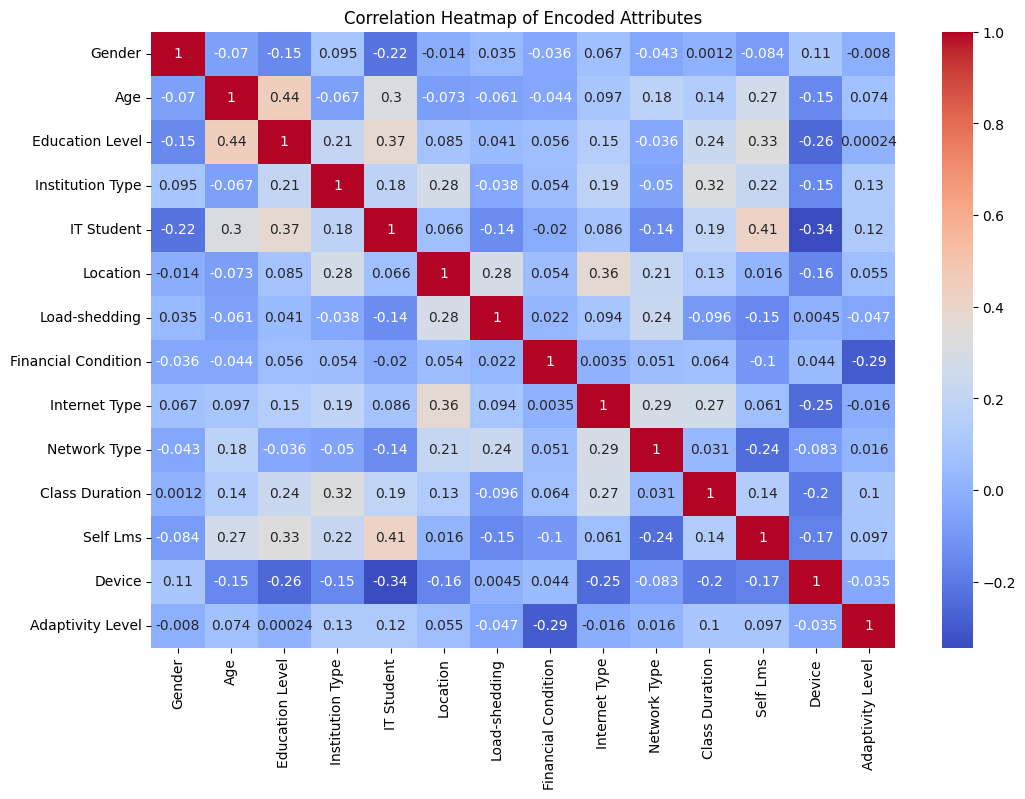

In [ ]:

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Encoded Attributes")
plt.show()

This heatmap shows the correlation between all encoded attributes after preprocessing. Most correlations are weak, meaning the attributes are fairly independent and provide unique information. A moderate positive correlation appears between Age and Education Level (0.44), showing that older students usually have higher education levels. There’s also a noticeable relationship between IT Student and Self LMS (0.41), suggesting IT students tend to use LMS more. No attributes have a very high correlation (close to 1), indicating there’s no redundancy in the dataset and all features can be kept for further analysis.

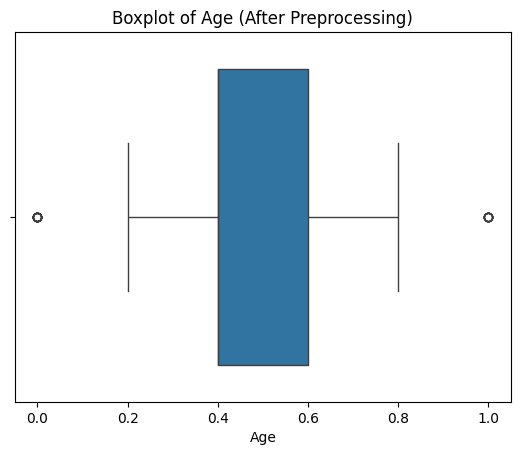

In [ ]:
#Age Boxplot
sns.boxplot(x=df["Age"])
plt.title("Boxplot of Age (After Preprocessing)")
plt.xlabel("Age")
plt.show()

This boxplot shows the distribution of the Age attribute after preprocessing. Most students fall within the middle range (around 0.4–0.8), while a few outliers appear at both ends (near 0 and 1), indicating some students are noticeably younger or older than the rest.

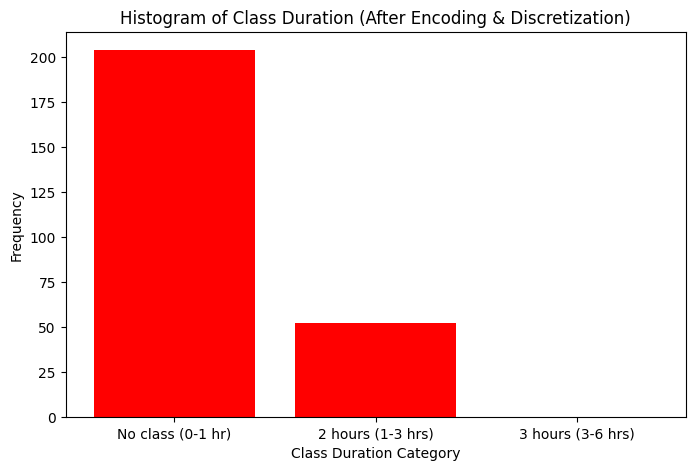

In [ ]:
#Histogram of the class duration after encoding and discretization

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot histogram for discretized class duration
plt.hist(df['Class Duration'],
         bins=[-0.5, 0.5, 1.5, 2.5],
         color='red', rwidth=0.8)

# Set category labels
plt.xticks([0, 1, 2], ['No class (0-1 hr)', '2 hours (1-3 hrs)', '3 hours (3-6 hrs)'])

# Titles and labels
plt.title("Histogram of Class Duration (After Encoding & Discretization)")
plt.xlabel("Class Duration Category")
plt.ylabel("Frequency")

plt.show()

This histogram shows that most students have class durations between 1–3 hours (around 200 students), followed by a smaller group with 0–1 hour (no class) durations. There are no students in the 3–6 hour category.

In [ ]:
# Save the final preprocessed dataset
df.to_csv("Cleaned_dataset.csv", index=False)


In [ ]:
df_before = pd.read_csv("Raw_dataset.csv")


print("===== DATA BEFORE PROCESSING =====")
print(df_before)


===== DATA BEFORE PROCESSING =====
     Gender     Age Education Level Institution Type IT Student Location  \
0       Boy   21-25      University   Non Government         No      Yes   
1      Girl   21-25      University   Non Government         No      Yes   
2      Girl   16-20         College       Government         No      Yes   
3      Girl  15-Nov          School   Non Government         No      Yes   
4      Girl   16-20          School   Non Government         No      Yes   
...     ...     ...             ...              ...        ...      ...   
1200   Girl   16-20         College   Non Government         No      Yes   
1201   Girl   16-20         College   Non Government         No       No   
1202    Boy  15-Nov          School   Non Government         No      Yes   
1203   Girl   16-20         College   Non Government         No       No   
1204   Girl  15-Nov          School   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type

**Before Preprocessing:**

The dataset originally contained 1205 rows and 14 columns.
All features were in their raw, original form, including:

Categorical attributes (e.g., Gender, Education Level, Institution Type, Network Type, Device, Adaptivity Level).

Age ranges in textual format (e.g., "16–20", "21–25", "15-Nov").

Mixed text categories across all features.
The data contained:

Non-numeric values that required encoding.
Inconsistent formats such as "15-Nov" inside the Age column.

Multiple categorical variables that needed conversion for modeling.

No scaling or transformation had been applied yet.


In [ ]:
df_after = pd.read_csv("Cleaned_dataset.csv")

print("===== DATA AFTER PROCESSING =====")
print(df_after)


===== DATA AFTER PROCESSING =====
     Gender  Age  Education Level  Institution Type  IT Student  Location  \
0         0  0.6                2                 1           0         1   
1         1  0.6                2                 1           0         1   
2         1  0.4                0                 0           0         1   
3         1  0.2                1                 1           0         1   
4         1  0.4                1                 1           0         1   
..      ...  ...              ...               ...         ...       ...   
251       0  0.6                2                 1           1         0   
252       0  0.4                0                 0           0         1   
253       1  0.4                0                 1           0         0   
254       0  0.6                2                 1           1         0   
255       0  0.6                2                 1           1         1   

     Load-shedding  Financial Condition  

**After Preprocessing:**

After preprocessing, the dataset became fully numerical, which is required for machine learning algorithms.

All categorical attributes were encoded into numeric values (e.g., Boy→0, Girl→1).

The Age ranges were successfully converted into numeric scaled values (e.g., 0.2, 0.4, 0.6).

The dataset size changed to 256 rows after removing duplicated entries

Feature scaling/normalization was applied to ensure:
Consistent value ranges
All features contribute equally to the model
The final output shows each column in clean integer or normalized format with no text values remaining.

## Loading the dataset and Import libraries:

In [ ]:
#read Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('students_adaptability_level_online_education.csv')
df=pd.DataFrame(data)
df_copy=df.copy()
df.head()



#Statistical Summries:

In [ ]:
#Statistical summries
df.describe()

From the statistical summary, we can see for each attribute how many entries there are (count), how many different categories exist (unique), which value appears the most (top), and how many times it appears (freq). This helps me notice which values are the most common, like the most used device or the most frequent institution type.


Because the data is mostly categorical (not numeric), we can’t apply the five-number summary [which shows the minimum, Q1, median, Q3, and maximum] the way we do with numeric columns.

# Show Missing Values:

In [ ]:
#Missing values
print("\nTotal number of missing values in the dataset:", df.isna().sum())

The dataset contains no missing values in any column (all 1205 rows × 14 attributes are complete). Therefore, no imputation or deletion of missing data is required at this stage.

### Graphs:

In [ ]:
#Bar-plot for Gender attribute
sns.countplot(x='Gender',data=df)
plt.title("Distribution of Gender")
plt.ylabel("Count")
plt.show()

Distribution of Gender: Bar Chart
This bar chart shows that the dataset has more boys (about 55%) than girls (about 45%).. the difference is not very large, but boys are still the majority group.


In [ ]:
##Bar-plot for  Education Level attribute
sns.countplot(x='Education Level', data=df)
plt.title("Distribution of Educational Level")
plt.ylabel("Count")
plt.show()

Distribution of Educational Level: Bar Chart
This bar chart shows that school students form the largest group (about %44), followed by university students (about 39%).. college students are the smallest group compared to the others (about 17%).


In [ ]:
# Count values for IT Student
counts = df["IT Student"].value_counts()

# Pie chart
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of IT vs Non-IT Students")
plt.ylabel(' ')
plt.show()

Distribution of IT vs Non-IT Students: Pie Chart





In [ ]:
#class lable distribution

counts = df["Adaptivity Level"].value_counts()
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of Adaptivity Level ")
plt.ylabel(' ')
plt.show()

Distribution of Adaptivity Level: Pie Chart

It shows that the dataset is not balanced across the three classes.
Moderate represents the majority class with 51.9% of students.
Low adaptability accounts for 39.8%, making it the second-largest group.
High adaptability is the minority class, representing only 8.3% of the dataset.
This distribution indicates a class imbalance, where the “High” class is significantly underrepresented compared to the other two. Such imbalance can influence model performance, causing classifiers to favor the majority classes (Moderate and Low) and struggle to correctly identify the minority class (High).



In [ ]:
#Grouped bar chart Financial Condition and Adaptivity Level
sns.countplot(x="Financial Condition", hue="Adaptivity Level", data=df)
plt.title("Financial Condition vs Adaptivity Level")
plt.ylabel("Count")
plt.show()


Financial Condition vs Adaptivity Level: Bar Chart
This bar chart shows that most students from middle financial condition are at moderate adaptability (about 55%).. students from poor condition are more likely to have low adaptability (about 60%), while rich students are very few overall (less than 5%).


In [ ]:
##Grouped bar chart Education Level and Adaptivity Level
sns.countplot(x='Education Level', hue="Adaptivity Level", data=df)
plt.title(" Education Level vs Adaptivity Level")
plt.ylabel("Count")
plt.show()

This grouped bar chart compares Education Level (School, College, University) with Adaptivity Level (Low, Moderate, High).
It shows that most participants across all education levels have a Moderate adaptivity level, while High adaptivity is the least common.

In [ ]:
import pandas as pd

# Load raw dataset
df_raw = pd.read_csv("https://raw.githubusercontent.com/RandDahmash/Mining-project/main/Dataset/Raw_dataset.csv")


## Data Cleaning:

1- Removing Duplicates:

In [ ]:
# Check for duplicate rows
num_duplicates = df_raw.duplicated().sum()
print("Number of duplicate rows:", num_duplicates , "\n")

df_raw = df_raw.drop_duplicates()
print("DataFrame after dropping all duplicate rows:\n")
print(df_raw)
df_raw.to_csv('Cleaned_dataset.csv', index=False)

We checked for duplicate rows in the dataset and found 949 duplicates.
Duplicate rows usually indicate repeated records of the same student, which can bias the analysis and models.
Therefore, we removed the duplicates to keep only unique entries.
The dataset is now cleaned and contains only distinct records

#  Data Transmission:

1- Encoding categorical data:

In [ ]:
# Data Preprocessing
import pandas as pd
df = pd.read_csv('Cleaned_dataset.csv')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to each column
for col in df.columns:
    if df[col].dtype == 'object':   # Only encode categorical columns
        df[col] = encoder.fit_transform(df[col])

print("\n All categorical attributes have been encoded into numeric form.")


#Display the data after Encode it
print("Dataset after Encoding : ")
print(df)

df.to_csv('Cleaned_dataset.csv', index=False)

2- Normalization:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Cleaned_dataset.csv')

scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])

df.to_csv('Cleaned_dataset.csv', index=False)
print("Age column after Normalization : ")
print(df)

Here in normalization we normalize the 'Age' column using Min-Max Scaling method since Age has a fixed and bounded range (1-30), min-max scaling is a good option as it retains the distribution of the data while normalizing to a 0-1 range

3- Discretization:

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv('Cleaned_dataset.csv')

# Map textual duration ranges to numeric midpoints
duration_mapping = {
    "0": 0,
    "1-3": 2,
    "3-6": 4.5
}

# Replace the 'Class Duration' column with numeric equivalents
df['Class Duration'] = df['Class Duration'].replace(duration_mapping)

# Define bins for discretization
bins = [0, 1, 3, 6]  # Bins: 0-1 (No class), 1-3 (2 hours), 3-6 (3 hours)
labels = ['0', '1', '2']

# Apply pd.cut() to discretize
df['Class Duration'] = pd.cut(
    df['Class Duration'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    duplicates='drop'
)

# Display the result
print("Class Duration after Discretization:")
print(df['Class Duration'])

# Save the binned dataset
df.to_csv('Cleaned_dataset.csv', index=False)


Here in discretization, we convert numbers to Ranking of class duration attribute to:

0: (0=no class)
1-3: (1 =2hours)
3-6: 2 (2= 3hours) we used mapping to convert the data into numeric equivalents based on the original duration range, then we binned it into three categories.

## Feature Selection:

1- chi square:

In [ ]:

from scipy.stats import chi2_contingency
df = pd.read_csv('Cleaned_dataset.csv')
# Create a contingency table
contingency_table = pd.crosstab(df['Adaptivity Level'], df['Education Level'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected ", expected)





Here we created a contingency table to analyze the relationship between 'Adaptivity Level' and 'Education Level', and then perform a Chi-Square test to determine if there is a significant association between these two categorical variables.



In [ ]:
#Five-numbers summary
df.describe()

**After the preprocessing steps and encoding all categorical data into numeric form, we became able to compute and display the five-number summary (Minimum, Q1, Median, Q3, Maximum) for the numerical attributes:**


The dataset contains 256 entries, and all variables show complete data with no missing values. Since most of the attributes are encoded numerically (0, 1, or 2), the five-number summary helps describe how these coded categories are distributed.

Mean: Across the attributes, the mean values
generally fall between 0 and 1, which reflects that most responses lie in the lower or middle encoded categories. This gives a sense of the “typical” level for each variable after encoding.

Standard Deviation: The standard deviation values range from around 0.22 to 0.78, showing that some attributes have very little variation (like Age and binary fields), while others display a wider spread (like Financial Condition and Education Level). Higher std values indicate that responses cover more categories.

Minimum: For all attributes, the minimum value is 0, representing the lowest encoded category in each field.

1st Quartile (25%): Most of the 25% percentile values also fall at 0 or 1, which means a large portion of the dataset belongs to the lower category group.

Median (50%): The median values show that half of the participants fall within the lowest or middle categories. For many binary variables, the median is 0, indicating that the majority of respondents belong to the first category.

3rd Quartile (75%): The 75% percentile typically reaches 1 or 2, showing the upper range of encoded responses and illustrating how the dataset spreads toward higher categories.

Maximum: Maximum values range between 1 and 2 depending on the variable, representing the highest category available in the encoding.


In summary, the five-number summary highlights that most attributes in the dataset are clustered around the lower and middle encoded categories, with moderate variation across variables. The quartiles and max values show how responses extend toward higher categories, giving a clear picture of both the central tendency and the spread of the encoded data.

## Graphs after Preprocessing:

In [ ]:

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Encoded Attributes")
plt.show()

This heatmap shows the correlation between all encoded attributes after preprocessing. Most correlations are weak, meaning the attributes are fairly independent and provide unique information. A moderate positive correlation appears between Age and Education Level (0.44), showing that older students usually have higher education levels. There’s also a noticeable relationship between IT Student and Self LMS (0.41), suggesting IT students tend to use LMS more. No attributes have a very high correlation (close to 1), indicating there’s no redundancy in the dataset and all features can be kept for further analysis.

In [ ]:
#Age Boxplot
sns.boxplot(x=df["Age"])
plt.title("Boxplot of Age (After Preprocessing)")
plt.xlabel("Age")
plt.show()

This boxplot shows the distribution of the Age attribute after preprocessing. Most students fall within the middle range (around 0.4–0.8), while a few outliers appear at both ends (near 0 and 1), indicating some students are noticeably younger or older than the rest.

In [ ]:
#Histogram of the class duration after encoding and discretization

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot histogram for discretized class duration
plt.hist(df['Class Duration'],
         bins=[-0.5, 0.5, 1.5, 2.5],
         color='red', rwidth=0.8)

# Set category labels
plt.xticks([0, 1, 2], ['No class (0-1 hr)', '2 hours (1-3 hrs)', '3 hours (3-6 hrs)'])

# Titles and labels
plt.title("Histogram of Class Duration (After Encoding & Discretization)")
plt.xlabel("Class Duration Category")
plt.ylabel("Frequency")

plt.show()

This histogram shows that most students have class durations between 1–3 hours (around 200 students), followed by a smaller group with 0–1 hour (no class) durations. There are no students in the 3–6 hour category.

In [ ]:
# Save the final preprocessed dataset
df.to_csv("Cleaned_dataset.csv", index=False)


In [ ]:
df_before = pd.read_csv("Raw_dataset.csv")


print("===== DATA BEFORE PROCESSING =====")
print(df_before)


**Before Preprocessing:**

The dataset originally contained 1205 rows and 14 columns.
All features were in their raw, original form, including:

Categorical attributes (e.g., Gender, Education Level, Institution Type, Network Type, Device, Adaptivity Level).

Age ranges in textual format (e.g., "16–20", "21–25", "15-Nov").

Mixed text categories across all features.
The data contained:

Non-numeric values that required encoding.
Inconsistent formats such as "15-Nov" inside the Age column.

Multiple categorical variables that needed conversion for modeling.

No scaling or transformation had been applied yet.


In [ ]:
df_after = pd.read_csv("Cleaned_dataset.csv")

print("===== DATA AFTER PROCESSING =====")
print(df_after)


**After Preprocessing:**

After preprocessing, the dataset became fully numerical, which is required for machine learning algorithms.

All categorical attributes were encoded into numeric values (e.g., Boy→0, Girl→1).

The Age ranges were successfully converted into numeric scaled values (e.g., 0.2, 0.4, 0.6).

The dataset size changed to 256 rows after removing duplicated entries

Feature scaling/normalization was applied to ensure:
Consistent value ranges
All features contribute equally to the model
The final output shows each column in clean integer or normalized format with no text values remaining.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Load the Dataset
df = pd.read_csv("https://raw.githubusercontent.com/RandDahmash/Mining-project/main/Dataset/Cleaned_dataset.csv")
df.head()



### Dropping High Correlated Attributes


## Network Type and Internet Type

In [ ]:

from scipy.stats import chi2_contingency, chi2




# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['Network Type'], df['Internet Type'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")


## Institution Type and Education Level

In [ ]:


from scipy.stats import chi2_contingency, chi2

# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['Institution Type'], df['Education Level'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")

## Load-shedding and Location

In [ ]:

from scipy.stats import chi2_contingency, chi2

# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['Load-shedding'], df['Location'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")


## Self Lms and Age

In [ ]:

from scipy.stats import chi2_contingency, chi2

# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['Self Lms'], df['Age'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")


## IT Student and Gender

In [ ]:

from scipy.stats import chi2_contingency, chi2

# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['IT Student'], df['Gender'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")


## Class Duration and Age

In [ ]:

from scipy.stats import chi2_contingency, chi2


# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['Class Duration'], df['Age'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")


## Institution Type and Location

In [ ]:

from scipy.stats import chi2_contingency, chi2


# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['Institution Type'], df['Location'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")


## Education Level and Device

In [ ]:

from scipy.stats import chi2_contingency, chi2


# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['Education Level'], df['Device'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")


## Internet Type and Class Duration

In [ ]:

from scipy.stats import chi2_contingency, chi2

# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['Internet Type'], df['Class Duration'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")


## Load-shedding and Financial Condition

In [ ]:

from scipy.stats import chi2_contingency, chi2


# Create a contingency table between two categorical attributes
contingency_table = pd.crosstab(df['Load-shedding'], df['Financial Condition'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


# Set the significance level (alpha)
alpha = 0.001

# Compute the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Print the significance level, critical value, and p-value
print("\nSignificance Level (alpha):", alpha)
print("Critical Value (α =", alpha, ", df =", dof, "):", critical_value)
print("p-value:", p_value)

# Apply the decision rule:
# If the calculated chi-square statistic is greater than the critical value,
# reject the null hypothesis (H₀) → the variables are not independent → correlated.
# Otherwise, fail to reject H₀ → the variables are independent → not correlated.

if chi2_stat > critical_value:
    print("\nDecision: Reject H₀")
    print("Conclusion: The variables are NOT independent → They are CORRELATED.")
else:
    print("\n Decision: Fail to reject H₀")
    print("Conclusion: The variables are independent → They are NOT correlated.")


## Dropping and Load File

In [ ]:


# List of columns to DROP (correlated / redundant)
cols_to_drop = [
    "Internet Type",
    "Institution Type",
    "Location",
    "Age",
    "Gender",
    "Device",
    "Self Lms",
    "Financial Condition"
]

# Drop those columns safely
df_reduced = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Display new dataset shape and columns
print(" Reduced dataset created successfully!")
print("Shape:", df_reduced.shape)
print("Remaining columns:", list(df_reduced.columns))

# Save the reduced dataset for further use
df_reduced.to_csv("Reduced_dataset.csv", index=False)
print("File saved as: Reduced_dataset.csv")

#keep working with df instead of df_reduced
df=df_reduced.copy()

## Splitting dataset in feature and target variable


In [ ]:
#Split dataset in features and target variable
fn=df.keys().tolist()[:-1]
X = df[fn]#Features names
y = df["Adaptivity Level"]#target variable




# **Classification**






# **1**-Splitting dataset into 70% Training and 30% Testing

In [ ]:

# Split dataset into 70% Training and 30% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

training set is 179 row and testing in 77 row

## Gini index

In [ ]:
#Build Decision Tree Model (Gini Index)

# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 70/30 Split)")
plt.show()

**Accuracy = 51.9%**

The diagonal elements (0, 24, 16) show correctly classified samples for each class (moderate,low, high).

The model performs best for the Low class (label = 1) with 24 correct predictions.

There is significant confusion between class 0 (High) and class 1 (Low), where several “High” adaptivity students are predicted as “Low” (22 misclassified)








In [ ]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

The tree starts by splitting on Class Duration because this was the feature that separated the data the best at the beginning. After that, it keeps using IT Student, Network Type, Education Level, and Load-shedding to try to separate the classes.

But none of these features give a strong or clear split, so the tree keeps growing and becomes big and messy. This shows that the data doesn’t have strong patterns, and the model is just trying many small splits to reduce impurity.

## Entropy


In [ ]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 70/30 Split)")
plt.show()

**Accuracy=51.9%**

The diagonal elements (0, 24, 16) represent the correctly classified samples for each class  (moderate,low, high).

The model performs best for the Low class (label = 1) with 24 correct predictions.

There is noticeable confusion between class 0 (High) and class 1 (Low), where several “High” adaptivity students are predicted as “Low” (22 misclassified)


In [ ]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10),dpi=1000)
tree.plot_tree(dt_entropy,feature_names=fn,class_names=cn,filled=True)

This entropy-based decision tree uses Class Duration as the first split, meaning it gave the highest information gain in the entire dataset. After that, the tree keeps splitting using IT Student, Network Type, Education Level, and Load-shedding.

The splits are small and inconsistent because none of the features provide a strong pattern. That’s why the tree becomes large, with many branches trying to reduce entropy little by little.

## Comparsion :
Gini Index accuracy=	51.9%

Information Gain (Entropy) accuracy=	51.9%

Both Gini and Entropy gave ≈ 51.9% accuracy, performing best on “Low” adaptivity but confusing “High” with “Low,” showing no major difference between the two criteria.

# 2-Splitting dataset into 80% Training and 20% Testing

In [ ]:
# Split dataset into 80% Training and 20% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

training set is 204 rows and testing is 52 row

## Gini index

In [ ]:
#Build Decision Tree Model (Gini Index)
# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 80/20 Split)")
plt.show()

**Accuracy= 53.8%**

The diagonal elements (0, 8, 20) represent the correctly classified samples for each class  (moderate,low, high).

The model performs best for the High class (label = 0) with 20 correct predictions, followed by the Low class (label = 1) with 8 correct predictions.
However, it completely fails to classify the Moderate class (label = 2), as none of its samples were predicted correctly.

In [ ]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

This Gini-based decision tree starts with Class Duration as the first split, meaning this feature provided the strongest separation between the classes in the 80% training data. After that, the tree continues splitting using the same main attributes as before—IT Student, Network Type, Education Level, and Load-shedding.

The structure still looks large and mixed, which shows that the dataset doesn't have clear or strong patterns. The tree needs many small splits to reduce impurity.

## Entropy

In [ ]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 80/20 Split)")
plt.show()

**Accuracy =53.8%**

The diagonal elements (0, 8, 20) represent the correctly classified samples for each class  (moderate,low, high).

The model performs best for the High class (label =0), with 20 correct predictions, followed by the Low class (label = 1), with 8 correct predictions.
Similar to the Gini model, it fails to correctly classify any samples from the Moderate class (label = 2), showing poor distinction for that category.

In [ ]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=1000)
tree.plot_tree(dt_entropy,feature_names=fn,class_names=cn,filled=True)

This entropy tree starts with Class Duration, which means it gave the highest information gain in the training data. After that, the tree keeps splitting using Load-shedding, IT Student, Network Type, and Education Level. These features don't provide strong or clean separation, so the tree keeps growing deeper and makes many small splits to reduce entropy.

## Comparsion

Both the Gini Index and Entropy (Information Gain) models achieved the same accuracy of approximately 53.8%, indicating that the choice of splitting criterion did not significantly affect the model’s performance.

#3-Splitting dataset into 90% Training and 10% Testing

In [ ]:
# Split dataset into 90% Training and 10% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

training set is 230 rows and testing set is 26 rows

## Gini Index

In [ ]:
#Build Decision Tree Model (Gini Index)

# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 90/10 Split)")
plt.show()

**Accuracy =46.1%**

The diagonal elements (0, 5, 7) represent the correctly classified samples for each class  (moderate,low, high).

The model performs best for the High class (label =0), with 7 correct predictions, followed by the Low class (label = 1), with 5 correct predictions.
 it fails to correctly classify any samples from the Moderate class (label = 2), showing poor distinction for that category.

In [ ]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

This Gini-based tree again starts with Class Duration, which means this feature gives the best split and reduces impurity the most at the top level. After that, the model continues splitting using features like IT Student, Network Type, Education Level, and Load-shedding.

The tree grows large because none of the features provides a strong or clean separation between the classes. The model keeps creating many small splits to try to make the groups more pure. This shows that the dataset has weak patterns and no dominant predictor. That’s also why the final accuracy remains low even though the training size changed

## Entropy

In [ ]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 90/10 Split)")
plt.show()

**Accuracy =46.1%**

The diagonal elements (0, 5, 7) represent the correctly classified samples for each class  (moderate,low, high).

The model performs best for the High class (label =0), with 7 correct predictions, followed by the Low class (label = 1), with 5 correct predictions.
 it fails to correctly classify any samples from the Moderate class (label = 2), showing poor distinction for that category.

In [109]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10),dpi=1000)
tree.plot_tree(dt_entropy,feature_names=fn,class_names=cn,filled=True)

[Text(0.532608695652174, 0.9375, 'Class Duration <= 0.5\nentropy = 1.369\nsamples = 230\nvalue = [23, 105, 102]\nclass = 1'),
 Text(0.2554347826086957, 0.8125, 'Education Level <= 0.5\nentropy = 1.345\nsamples = 183\nvalue = [17, 92, 74]\nclass = 1'),
 Text(0.3940217391304348, 0.875, 'True  '),
 Text(0.08695652173913043, 0.6875, 'Network Type <= 0.5\nentropy = 0.952\nsamples = 43\nvalue = [0, 27, 16]\nclass = 1'),
 Text(0.06521739130434782, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Text(0.10869565217391304, 0.5625, 'IT Student <= 0.5\nentropy = 0.959\nsamples = 42\nvalue = [0, 26, 16]\nclass = 1'),
 Text(0.08695652173913043, 0.4375, 'Network Type <= 1.5\nentropy = 0.937\nsamples = 34\nvalue = [0, 22, 12]\nclass = 1'),
 Text(0.043478260869565216, 0.3125, 'Load-shedding <= 0.5\nentropy = 0.961\nsamples = 13\nvalue = [0, 8, 5]\nclass = 1'),
 Text(0.021739130434782608, 0.1875, 'entropy = 0.863\nsamples = 7\nvalue = [0, 5, 2]\nclass = 1'),
 Text(0.065217391304347

This entropy-based tree starts with Class Duration, meaning this feature provided the highest information gain at the root. After that, the tree continues splitting using Education Level, Network Type, IT Student, and Load-shedding. These features don’t strongly separate the classes, so the tree ends up with many small and weak splits.

The tree becomes large and mixed because the dataset does not contain strong patterns. Most of the leaves still have a mix of classes, which shows that each split only reduces entropy a little.

## Comparsion

Both the Gini Index and Entropy (Information Gain) models achieved the same accuracy of approximately 46.1%, indicating that the choice of splitting criterion did not significantly affect the model’s performance.

# **Clustering**

## K-means Clustering

Load librarys & Prepare Features

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

# Load the preprocessed dataset
df = pd.read_csv("/content/Reduced_dataset.csv")

# Remove target column (Adaptivity Level) - clustering is unsupervised
X = df.drop(['Adaptivity Level'], axis=1)

# Scale the data
X_scaled = X

# 1-Silhouette method:

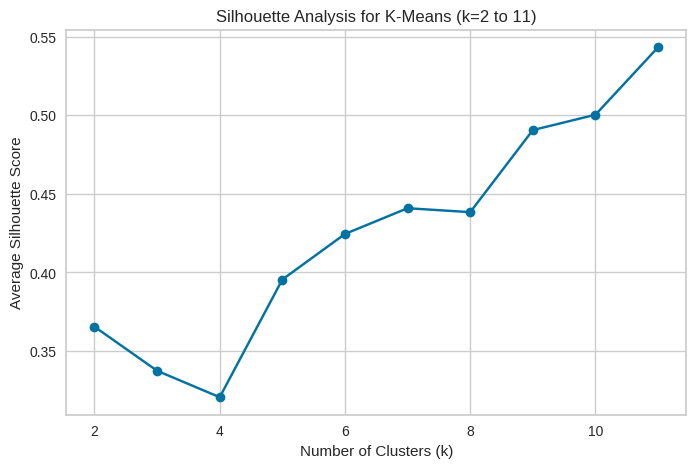

The highest silhouette score is 0.5434 at k = 11
The second highest silhouette score is 0.5004 at k = 10


In [111]:
k_values = range(2, 12)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Find best and second-best K
best_k = k_values[np.argmax(silhouette_scores)]
sorted_scores = sorted(silhouette_scores, reverse=True)
second_best_score = sorted_scores[1]
second_best_k = k_values[silhouette_scores.index(second_best_score)]

# Plot Silhouette scores
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Analysis for K-Means (k=2 to 11)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()

print(f"The highest silhouette score is {max(silhouette_scores):.4f} at k = {best_k}")
print(f"The second highest silhouette score is {second_best_score:.4f} at k = {second_best_k}")


# 2-Elbow Method:

NameError: name 'wss_values' is not defined

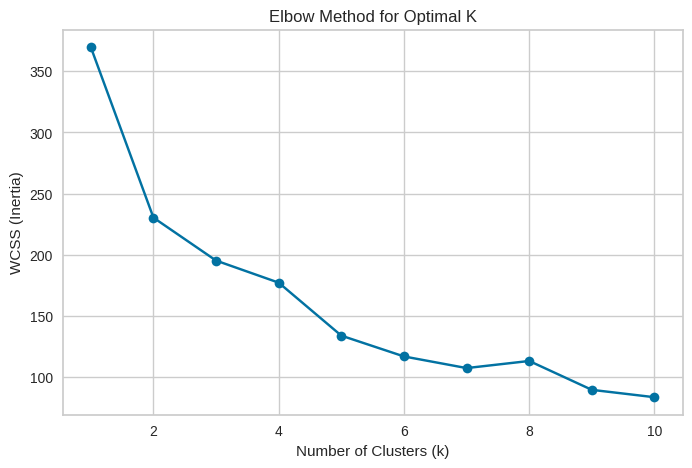

In [112]:
!pip install kneed
from kneed import KneeLocator

wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)

# Use KneeLocator to find the optimal k (elbow point)
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
optimal_k = knee.elbow
# Draw a vertical line at the elbow
plt.axvline(x=optimal_k, linestyle='--', color='red', label='Chosen k = {optimal_k}')
plt.legend()
plt.show()


From the Elbow plot, the curve starts to level off at **K = 5**..  
This means that adding more clusters after 5 doesn’t make a big improvement.  
So, **K = 5** is chosen as the best number of clusters for this dataset.

## **K = 3**

In [ ]:
# K-means with K = 3
np.random.seed(42)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans_result = kmeans.fit(X_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)




In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()


In [ ]:
# Calculate the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)

# Print the evaluation metrics
print(f"WSS: {wss}")
print(f"Average Silhouette Score: {silhouette_avg}")


## *K = 3 Analyisis*

For K = 3, the WSS value of 195.31 indicates that the clusters are reasonably compact.
The Average Silhouette Score of 0.337 is moderate, showing:
 • Good internal cohesion within clusters
 • Decent separation between clusters
 • Less overlap compared to higher K values

Although the silhouette score is not very high, it is still a meaningful clustering structure.

# K = 4

In [ ]:
np.random.seed(42)

# Perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_result = kmeans.fit(X_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)


In [ ]:
# Silhouette Plot for K=4
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()


In [ ]:
# Calculate the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)

# Print the evaluation metrics
print(f"WSS: {wss}")
print(f"Average Silhouette Score: {silhouette_avg}")


## Analysis of K = 4


For K = 4, WSS decreases to 177.27, meaning the clusters become more compact.
However, the Silhouette Score drops to 0.3209, which is:
 • Slightly lower than K = 3
 • Still moderate
 • Indicates that clusters start to overlap more

This shows that adding a fourth cluster:
 • Improves compactness
 • But reduces separation quality

# k = 5

In [ ]:
np.random.seed(42)

# Perform K-means clustering for K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans_result = kmeans.fit(X_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)


In [ ]:
# Silhouette Plot for K=5
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()


In [ ]:
# Calculate the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score

# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)

# Print the evaluation metrics
print(f"WSS: {wss}")
print(f"Average Silhouette Score: {silhouette_avg}")


## Analysis of K = 5

For K = 5, WSS further decreases to 134.01, showing strong compactness.
The Silhouette Score increases to 0.3955, which is:
 • The highest among all tested K values
 • Indicates better overall cluster quality
 • Shows improved cluster separation
 • Suggests fewer overlapping boundaries

K = 5 gives:
 • The most compact clusters
 • The best separation
 • The most meaningful structure among K = 3, 4, 5

## comparing the results

In [ ]:
import pandas as pd

data = {
    "Metric": ["WSS", "Silhouette"],
    "k=3": [195.3153, 0.3373],
    "k=4": [177.2791, 0.3286],
    "k=5": [134.0185, 0.3955]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

df.style.set_properties(**{'text-align': 'center'})

K = 3

K=3 gives moderately compact clusters with WSS = 195.31 and a Silhouette Score = 0.3373.
This score is higher than K=4, meaning the clusters in K=3 are better separated and have less overlap.
Overall, K=3 offers a good balance between cohesion and separation.

⸻

K = 4

K=4 reduces WSS further to 177.28, meaning the clusters became slightly tighter.
However, the Silhouette Score drops to 0.3286, which indicates that the clusters overlap more than in K=3.
So, although compactness improved, separation got slightly worse.

⸻

K = 5

K=5 has the lowest WSS = 134.01, meaning it produces the tightest clusters.
But it also gives the highest Silhouette Score = 0.3955, which means cluster separation is the strongest.
This indicates that K=5 provides:
 • The best cohesion (tight clusters)
 • The best separation (least overlap)
 • The clearest and most meaningful structure

## Final dicision:

Based on both WSS and Silhouette results, K = 5 is selected as the best number of clusters. Although compactness improves gradually from K=3 to K=5, the Silhouette Score shows the largest improvement at K=5, meaning that K=5 provides: • The tightest clusters • The best separation between clusters • The most meaningful and interpretable clustering structure

Therefore, K = 5 is the optimal K for this dataset.